In [1]:
# liebraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,OneHotEncoder ,LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score

# 1. Data Collection

In [3]:
data = 'kc_house_data.csv'
df = pd.DataFrame(pd.read_csv(data))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 2 Data Exploraing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 3 Data Cleaning

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df['id'].duplicated().sum()
df = df.drop_duplicates('id')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# removing unwanted columns in dataframe

cols_to_drop = np.array(['id','date','zipcode'])
df = df.drop(cols_to_drop , axis = 1)

In [11]:
# handling outlayers in numerical columns

num_cols = np.array(['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement', 'sqft_living15','sqft_lot15'])
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 *IQR
    upper_bound = q3 + 1.5 *IQR
    outlayers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'outlayers in {col}')
    print(outlayers)

outlayers in price
           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5      1225000.0         4       4.50         5420    101930     1.0   
21     2000000.0         3       2.75         3050     44867     1.0   
49     1350000.0         3       2.50         2753     65005     1.0   
69     1325000.0         5       2.25         3200     20158     1.0   
125    1450000.0         4       2.75         2750     17789     1.5   
...          ...       ...        ...          ...       ...     ...   
21568  1700000.0         4       3.50         3830      8963     2.0   
21576  3567000.0         5       4.50         4850     10584     2.0   
21590  1222500.0         4       3.50         4910      9444     1.5   
21597  1575000.0         4       3.25         3410     10125     2.0   
21600  1537000.0         5       3.75         4470      8088     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
5               0     0          3     11   

# 4. Data Preprocessing

In [13]:
# Data transformation
# log transformation
df['price'] = np.log(df['price'])

# suareroot transformationnp.sqrt
df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']] = np.sqrt(df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,34.351128,75.166482,1.0,0,0,3,7,34.351128,0.000000,1955,0,47.5112,-122.257,36.606010,75.166482
1,13.195614,3,2.25,50.695167,85.099941,2.0,0,0,3,7,46.583259,20.000000,1951,1991,47.7210,-122.319,41.109610,87.401373
2,12.100712,2,1.00,27.748874,100.000000,1.0,0,0,3,6,27.748874,0.000000,1933,0,47.7379,-122.233,52.153619,89.788641
3,13.311329,4,3.00,44.271887,70.710678,1.0,0,0,5,7,32.403703,30.166206,1965,0,47.5208,-122.393,36.878178,70.710678
4,13.142166,3,2.00,40.987803,89.888820,1.0,0,0,3,8,40.987803,0.000000,1987,0,47.6168,-122.045,42.426407,86.619859


In [14]:
# feature scaling
# standardization
scaler = StandardScaler()
df[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']] = scaler.fit_transform(df[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']])

In [15]:
# data spliting

X = df.drop(['price'] ,axis =1)
y = df['price']

X_train ,X_test ,y_train ,y_test = train_test_split(X, y ,test_size = 0.2 ,random_state = 42)

print('training dataset \n')
X_train.head()

training dataset 



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
5300,2,1.00,-0.394263,0.285010,1.5,0,0,5,7,-0.049974,-0.755307,1930,0,47.7001,-122.200,-0.211098,0.159519
11670,4,1.50,-1.201119,0.106020,1.0,0,0,4,7,-0.892848,-0.755307,1954,0,47.5704,-122.141,-0.928528,0.195198
21329,3,2.50,-0.700086,-0.977002,3.0,0,0,3,8,-0.369449,-0.755307,2009,0,47.6995,-122.346,-0.819925,-1.036261
6672,3,2.50,0.898079,-0.042382,2.0,0,0,3,10,1.300059,-0.755307,1991,0,47.6249,-122.024,1.429716,-0.072604
5318,3,1.75,-0.432903,0.448133,1.0,0,0,3,7,-0.876382,0.933788,1969,0,47.7260,-122.203,-0.855870,0.185879


In [16]:
print('testing dataset \n')
X_train.head()

testing dataset 



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
5300,2,1.00,-0.394263,0.285010,1.5,0,0,5,7,-0.049974,-0.755307,1930,0,47.7001,-122.200,-0.211098,0.159519
11670,4,1.50,-1.201119,0.106020,1.0,0,0,4,7,-0.892848,-0.755307,1954,0,47.5704,-122.141,-0.928528,0.195198
21329,3,2.50,-0.700086,-0.977002,3.0,0,0,3,8,-0.369449,-0.755307,2009,0,47.6995,-122.346,-0.819925,-1.036261
6672,3,2.50,0.898079,-0.042382,2.0,0,0,3,10,1.300059,-0.755307,1991,0,47.6249,-122.024,1.429716,-0.072604
5318,3,1.75,-0.432903,0.448133,1.0,0,0,3,7,-0.876382,0.933788,1969,0,47.7260,-122.203,-0.855870,0.185879


# 5 EDA

In [18]:
# Discreptive Stats
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.143600e+04,21436.000000,21436.000000,2.143600e+04,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,2.143600e+04,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,2.143600e+04,2.143600e+04
mean,2.969986e-16,3.371571,2.117349,3.712483e-17,-1.962312e-16,1.496198,0.007604,0.235118,3.410384,7.661737,-2.121419e-17,5.833902e-17,1971.098433,84.729800,47.560156,-122.213697,-1.214512e-15,1.591064e-16
std,1.000023e+00,0.929205,0.769913,1.000023e+00,1.000023e+00,0.540388,0.086871,0.767092,0.650235,1.174256,1.000023e+00,1.000023e+00,29.385277,402.431012,0.138601,0.140896,1.000023e+00,1.000023e+00
min,-3.460739e+00,0.000000,0.000000,-2.892179e+00,-1.126002e+00,1.000000,0.000000,0.000000,1.000000,1.000000,-2.659398e+00,-7.553068e-01,1900.000000,0.000000,47.155900,-122.519000,-3.262850e+00,-1.251310e+00
25%,-6.942164e-01,3.000000,1.750000,-7.139179e-01,-4.351231e-01,1.000000,0.000000,0.000000,3.000000,7.000000,-7.314010e-01,-7.553068e-01,1952.000000,0.000000,47.471100,-122.328000,-7.311391e-01,-4.522927e-01
50%,-5.981702e-02,3.000000,2.250000,-8.489044e-02,-2.019323e-01,1.500000,0.000000,0.000000,3.000000,7.000000,-1.998200e-01,-7.553068e-01,1975.000000,0.000000,47.572000,-122.230000,-1.473734e-01,-1.758837e-01
75%,6.235007e-01,4.000000,2.500000,6.151100e-01,2.981285e-02,2.000000,0.000000,0.000000,4.000000,8.000000,6.343684e-01,9.809343e-01,1997.000000,0.000000,47.678000,-122.124000,6.392932e-01,5.290361e-02
max,5.330244e+00,33.000000,8.000000,7.517318e+00,1.697051e+01,3.500000,1.000000,4.000000,5.000000,13.000000,6.095786e+00,4.338466e+00,2015.000000,2015.000000,47.777600,-121.315000,4.733535e+00,1.455278e+01


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >, <Axes: >]],
      dtype=object)

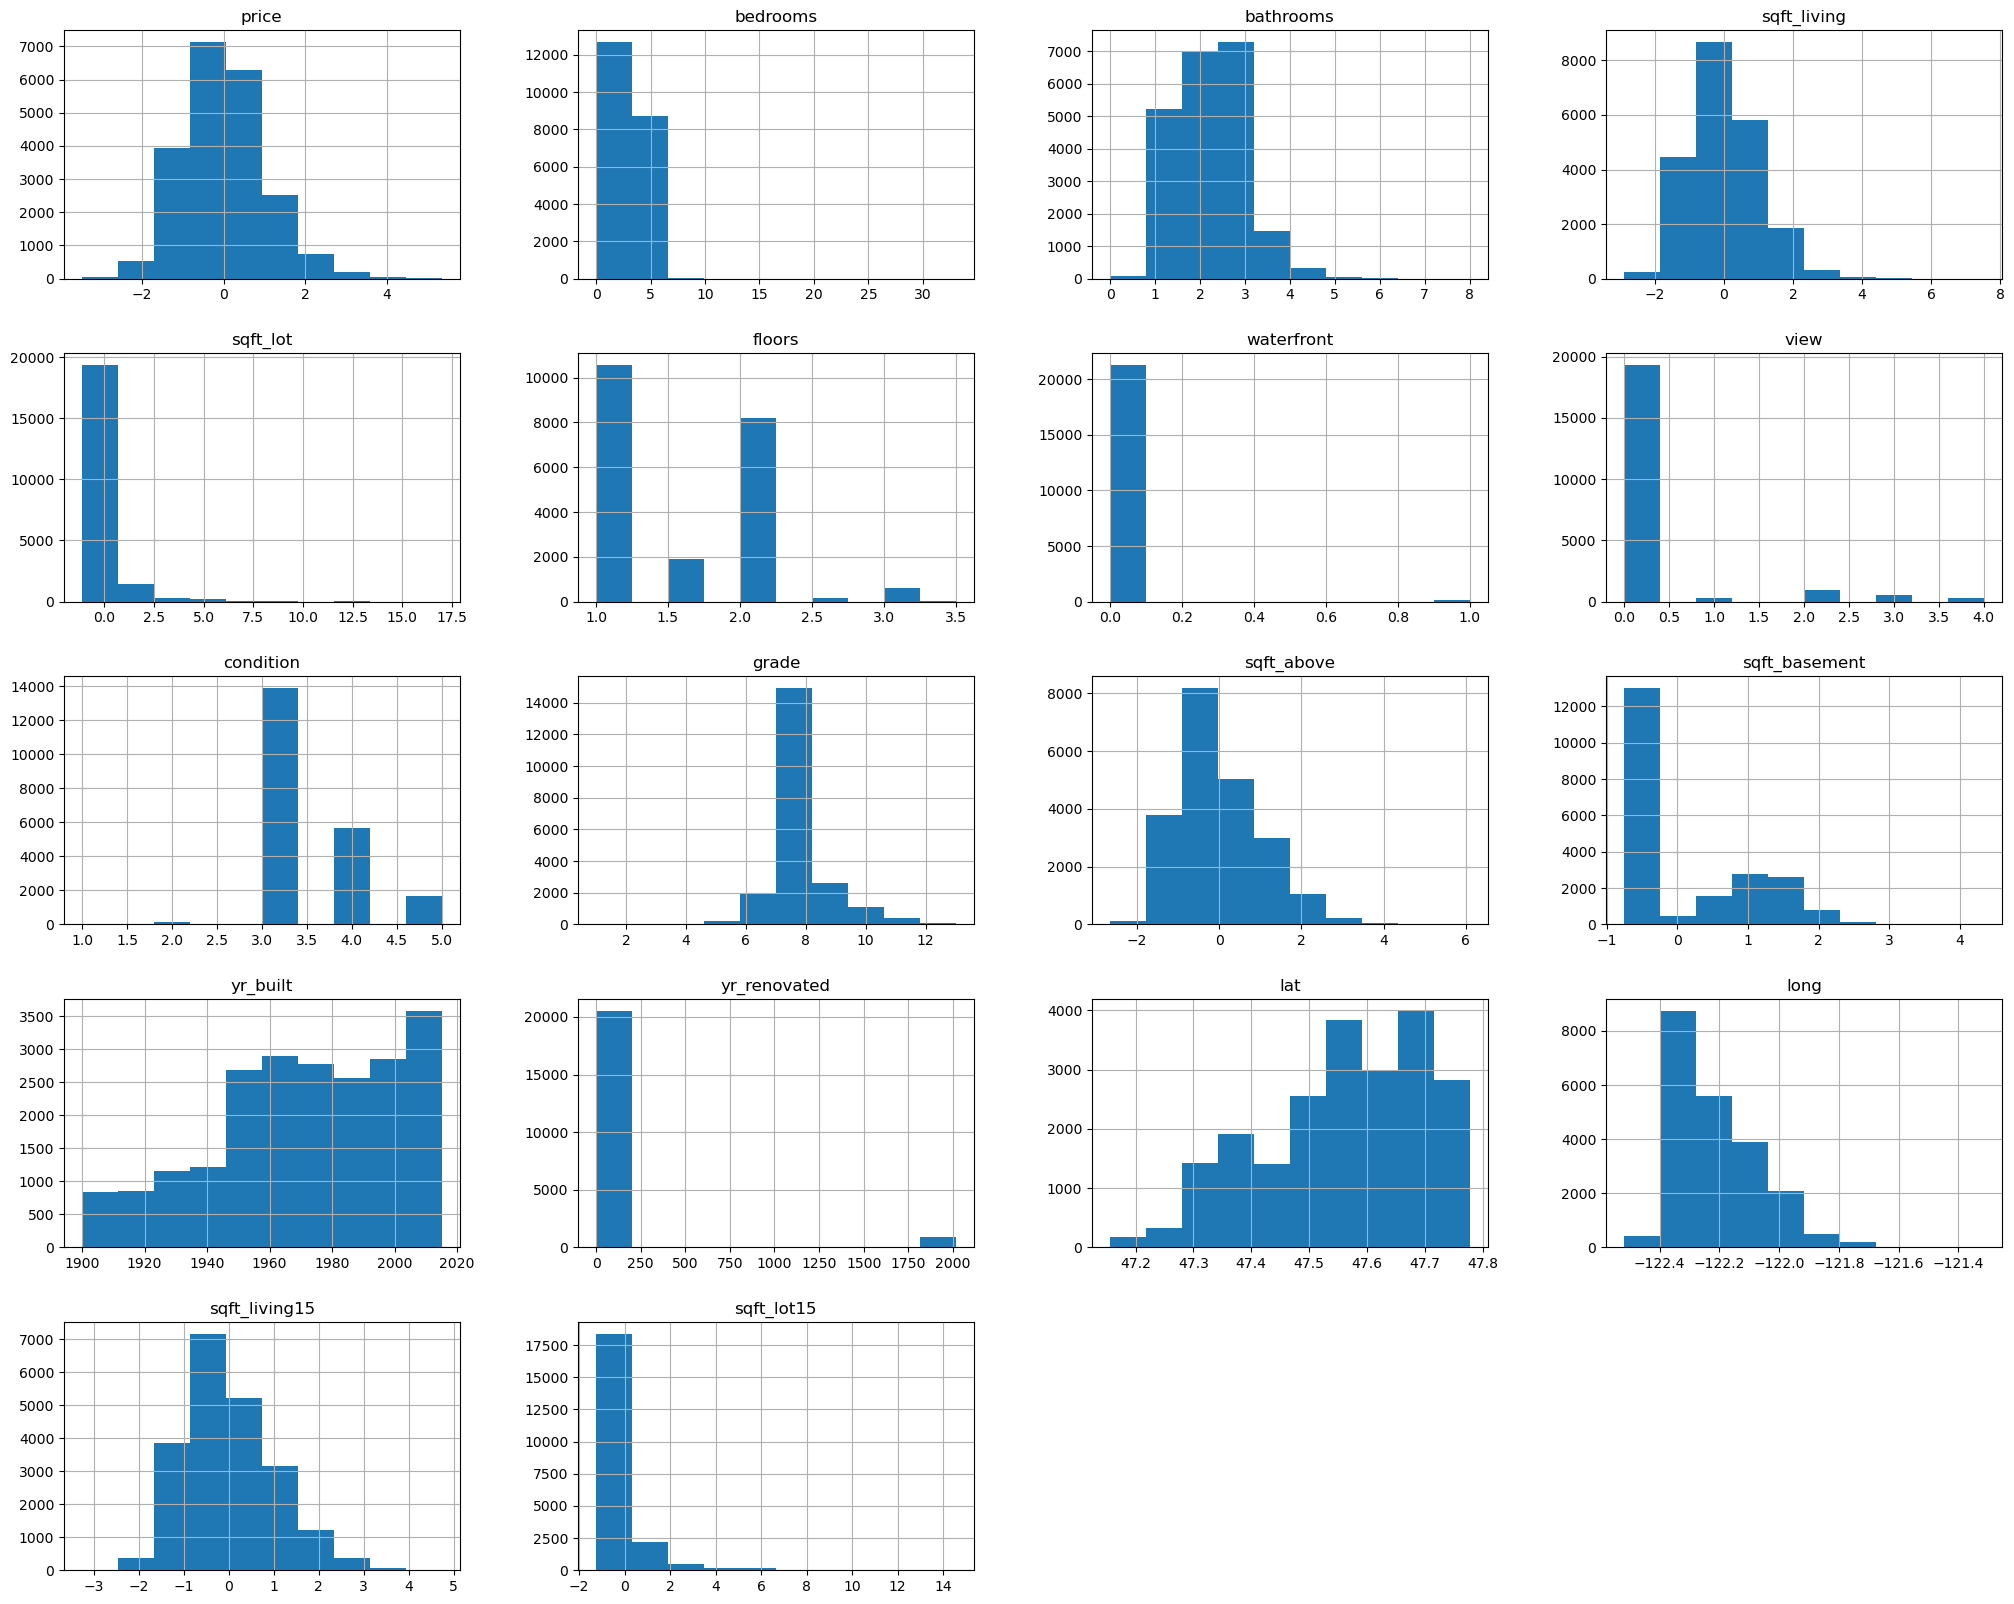

In [19]:
# data visualization
df.hist(figsize = (25,20))

<Axes: >

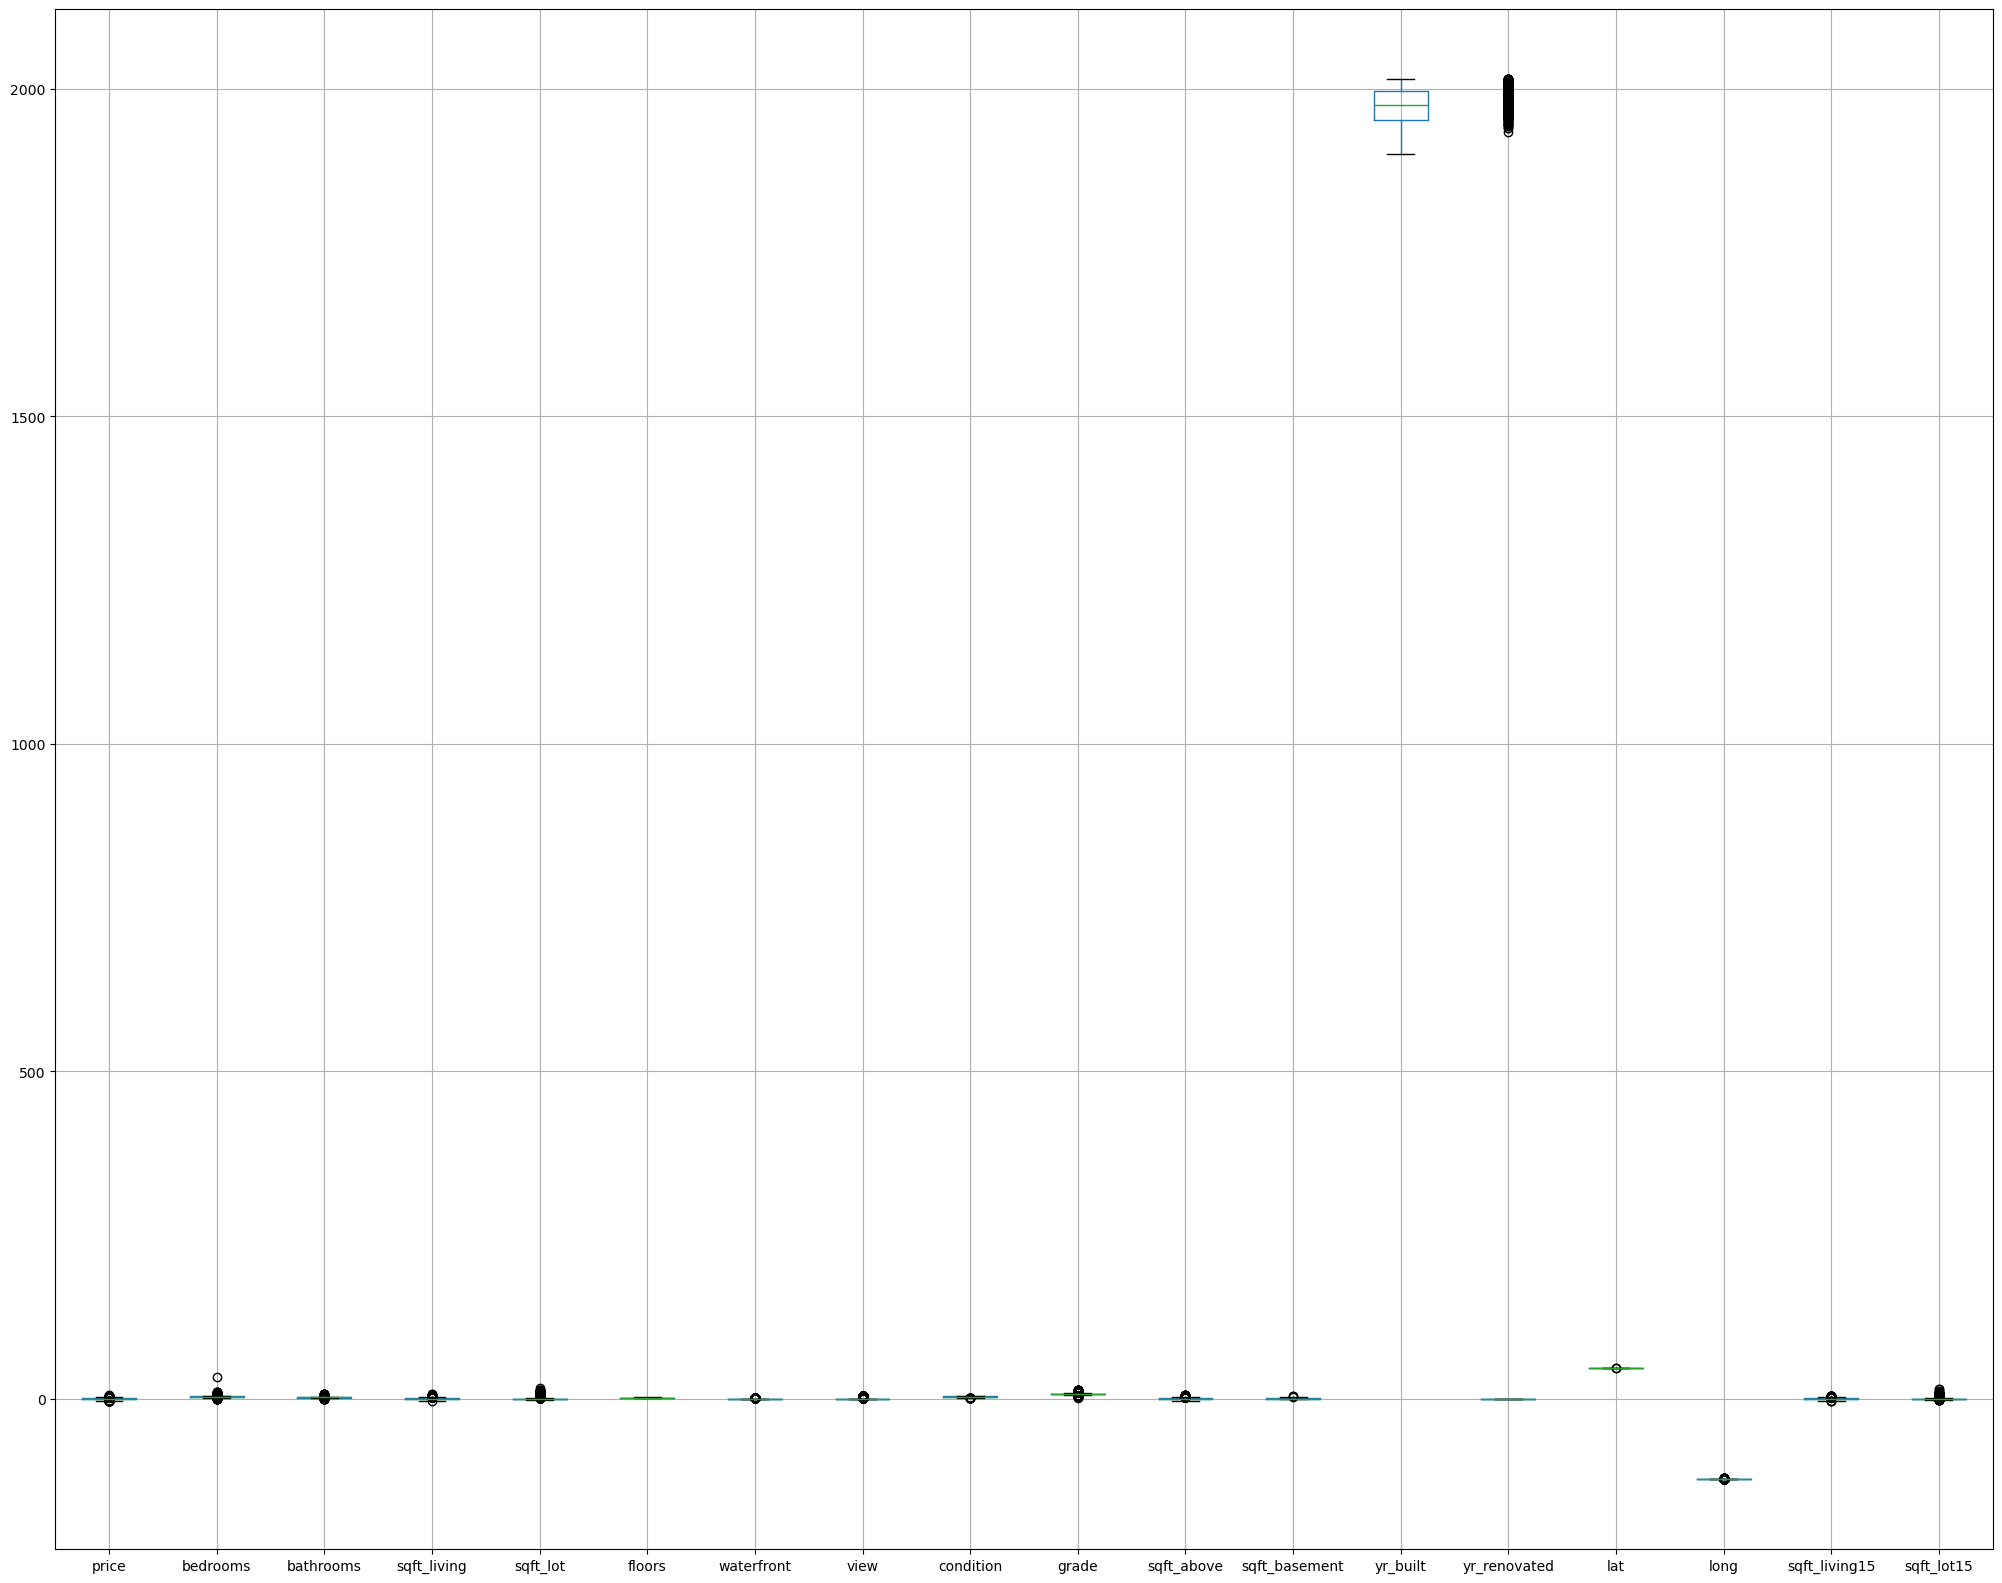

In [20]:
df.boxplot(figsize = (25,20))

In [21]:
# patern detection
correlation_matrix = df.corr()
print(f'correlation_matrix : \n {correlation_matrix}')

correlation_matrix : 
                   price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.344192   0.551080     0.693419  0.137065  0.310233   
bedrooms       0.344192  1.000000   0.516772     0.606479  0.095994  0.175207   
bathrooms      0.551080  0.516772   1.000000     0.765698  0.114315  0.499863   
sqft_living    0.693419  0.606479   0.765698     1.000000  0.266352  0.364162   
sqft_lot       0.137065  0.095994   0.114315     0.266352  1.000000 -0.085941   
floors         0.310233  0.175207   0.499863     0.364162 -0.085941  1.000000   
waterfront     0.175137 -0.006685   0.063734     0.091932  0.052067  0.023473   
view           0.346374  0.079542   0.186684     0.267461  0.103918  0.028211   
condition      0.038241  0.027896  -0.127839    -0.056999  0.017051 -0.266543   
grade          0.703948  0.358396   0.664727     0.761412  0.173021  0.457475   
sqft_above     0.599423  0.500895   0.695452     0.871900  0.270078  0.541364   
sqft_

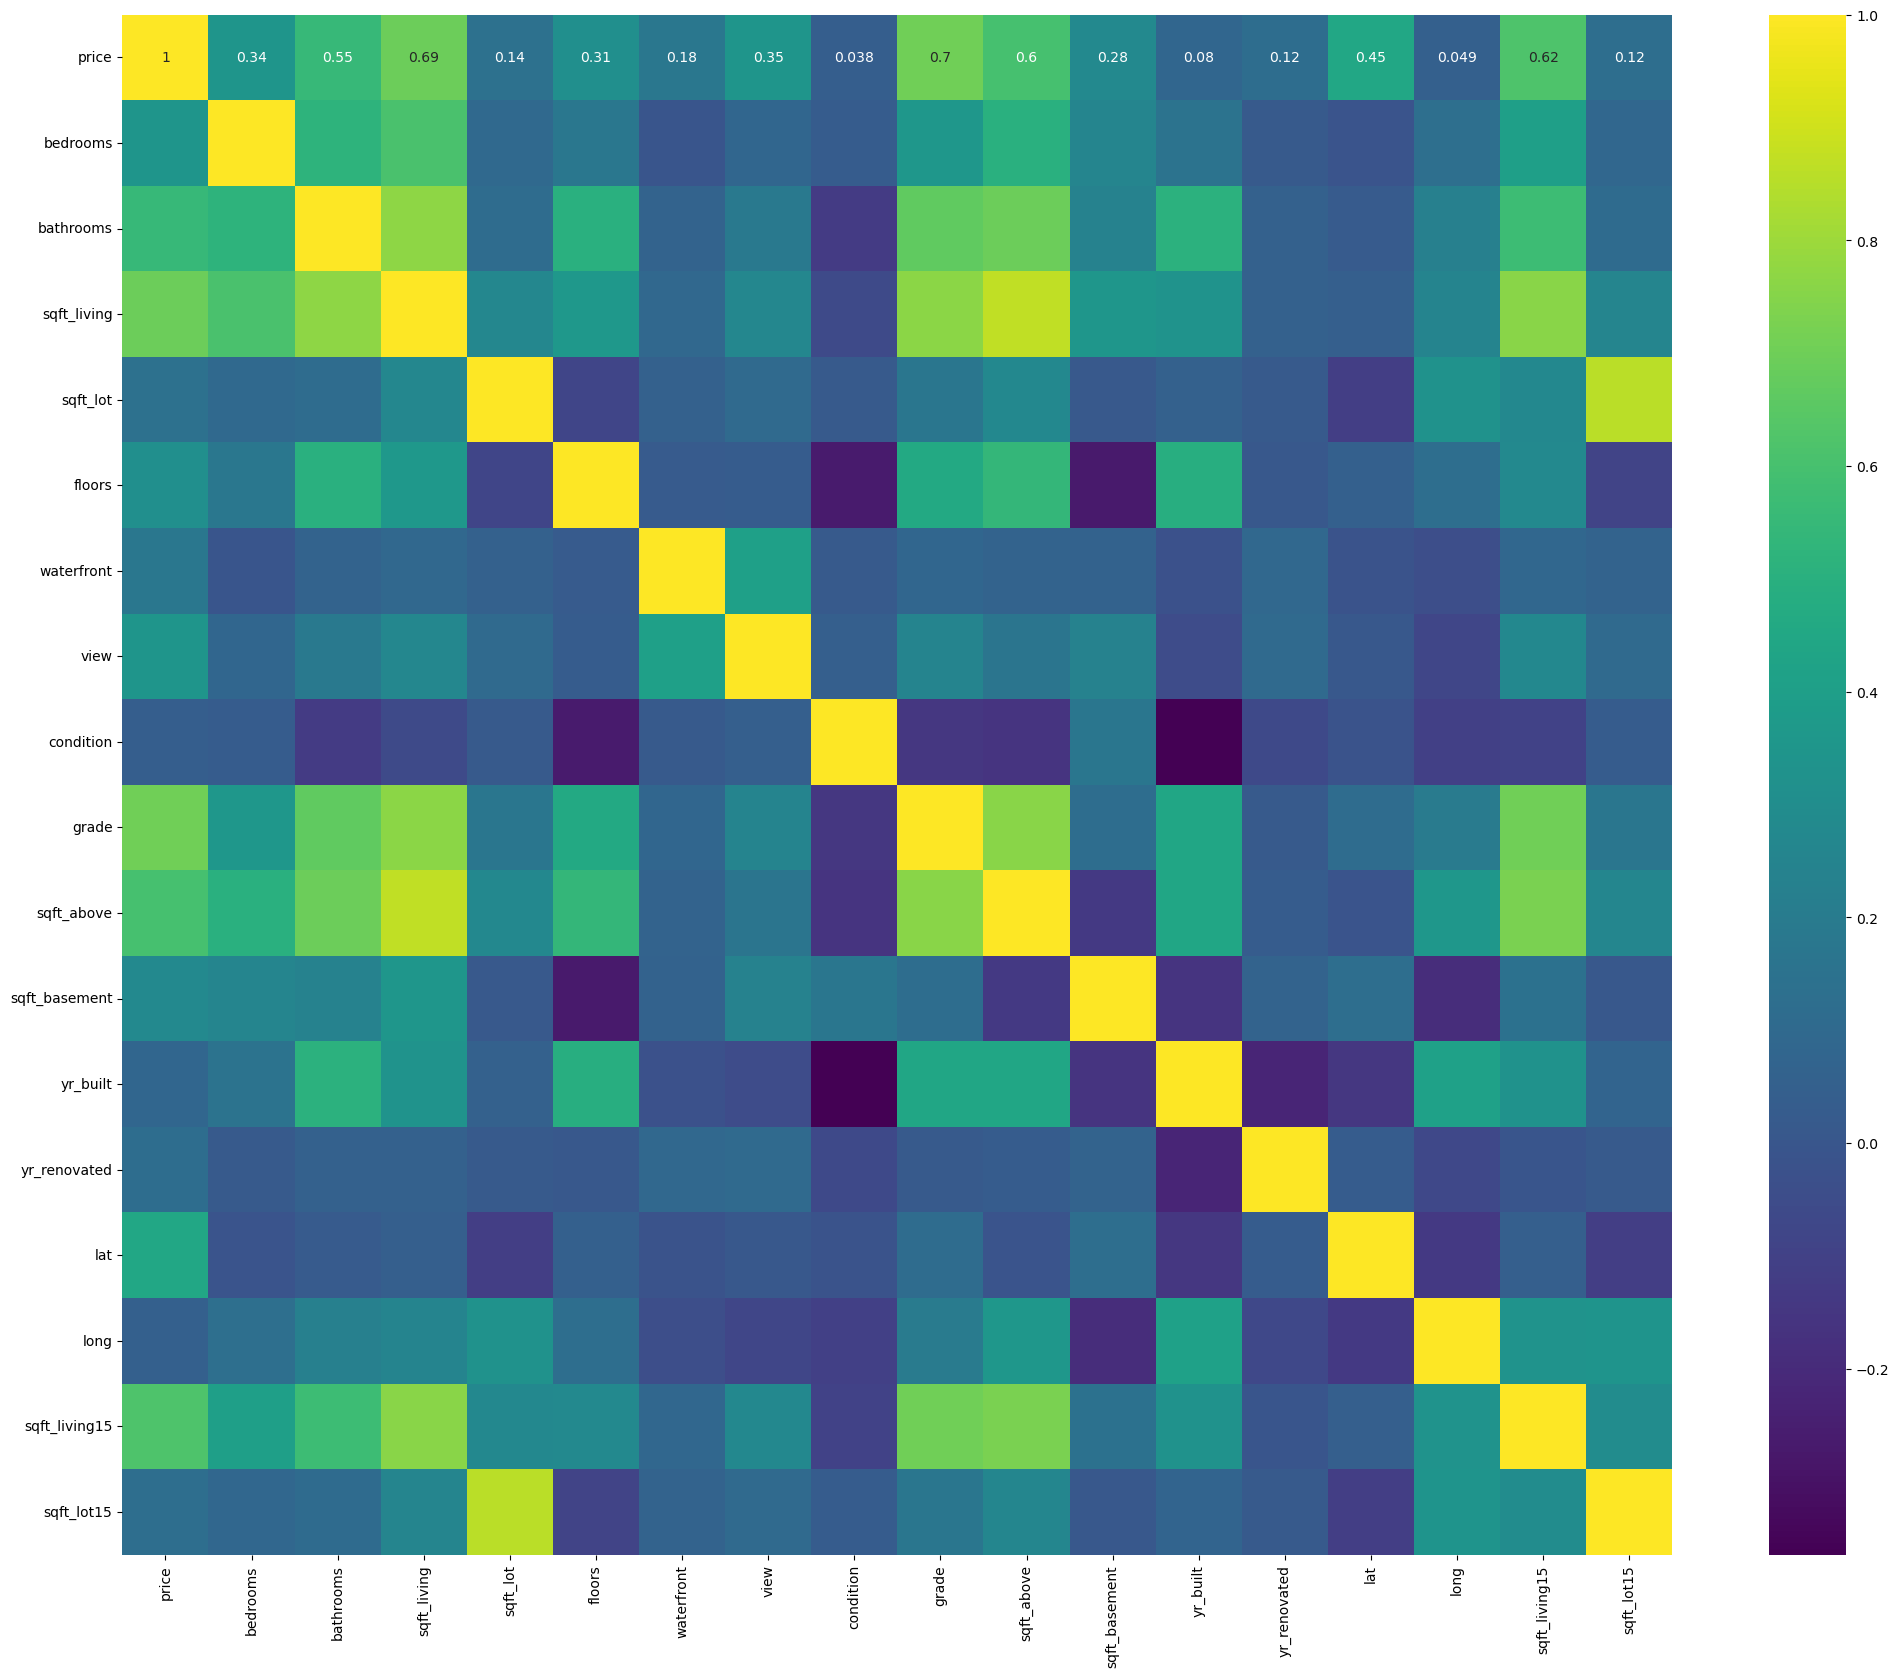

In [22]:
# Correlation matrix
plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis')
plt.show()

In [23]:
# hypothesis testing 

tstat,pvalue = stats.ttest_1samp(X , 0)
print('hypothesis testing :\n')
print(f't stat : {tstat}')
print(f'p value : {pvalue}')

tstat,pvalue = stats.ttest_1samp(y , 0)
print('hypothesis testing :\n')
print(f't stat : {tstat}')
print(f'p value : {pvalue}')

hypothesis testing :

t stat : [ 5.31242522e+02  4.02645505e+02  5.43533382e-15 -2.87296216e-14
  4.05373111e+02  1.28156659e+01  4.48756922e+01  7.67899868e+02
  9.55292035e+02 -3.10590504e-15  8.54123886e-15  9.82087995e+03
  3.08259604e+01  5.02397886e+04 -1.26996907e+05 -1.77813063e-13
  2.32942878e-14]
p value : [0.00000000e+000 0.00000000e+000 1.00000000e+000 1.00000000e+000
 0.00000000e+000 1.83926874e-037 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.00000000e+000 1.00000000e+000 0.00000000e+000
 3.33340468e-204 0.00000000e+000 0.00000000e+000 1.00000000e+000
 1.00000000e+000]
hypothesis testing :

t stat : 4.348267054606161e-14
p value : 0.9999999999999654


# 6. Model building

In [25]:
model =LinearRegression()
model.fit(X_train,y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test ,y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.22910584327036812
R² Score: 0.763806593916585


# 7. new data frame for prediction testing

In [27]:
new_df = {
    'bedrooms':3 ,
    'bathrooms': 2 ,
    'sqft_living': 76950 ,
    'sqft_lot': 375288 ,
    'floors':1.0 ,
    'waterfront':0 ,
    'view':0 ,
    'condition': 3,
    'grade':7,
    'sqft_above': 763136	,
    'sqft_basement':755307 ,
    'yr_built':1955 ,
    'yr_renovated':0 ,
    'lat':47.5112 ,
    'long':	122.257 ,
    'sqft_living15': 2246,
    'sqft_lot15': 386975   
}

new_df = pd.DataFrame([new_df])
predicted_price = model.predict(new_df)
print(f'predicted price : {predicted_price}')

predicted price : [305161.75865253]


In [28]:
new_df2 = {
    'bedrooms': 3,  # Typical house has 3 bedrooms
    'bathrooms': 2.0,  # A house may have 2 bathrooms
    'sqft_living': 1.50,  # Scaled value for living space, can be between -3 and +3 after scaling
    'sqft_lot': 0.75,  # Scaled value for lot size
    'floors': 2.0,  # Most houses have 1-2 floors
    'waterfront': 0,  # Not a waterfront property
    'view': 2,  # Medium view
    'condition': 3,  # Average condition
    'grade': 7,  # Grade of 7, indicating above-average construction
    'sqft_above': 1.20,  # Scaled sqft above ground level
    'sqft_basement': -0.5,  # Scaled sqft of basement, assuming it's smaller than the above
    'yr_built': 2000,  # House built in 2000
    'yr_renovated': 2010,  # Renovated in 2010
    'lat': 47.6,  # Latitude in Seattle area
    'long': -122.3,  # Longitude in Seattle area
    'sqft_living15': 1.50,  # Scaled value for living space of nearby houses
    'sqft_lot15': 0.80  # Scaled value for lot size of nearby houses
}

new_df2 = pd.DataFrame([new_df2])
predicted_price = model.predict(new_df2)
print(f'predicted price : {predicted_price}')


predicted price : [0.52863015]
